In [ ]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [ ]:
# import some bascis librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Divide the dataset into independent and dependent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
pd.get_dummies(X['Geography'])

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [ ]:
## Feature Engineering
geography= pd.get_dummies(X['Geography'],drop_first=True).astype(int)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
## Concatenate these variable wit hdataframe
X= X.drop(['Geography','Gender'],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X= pd.concat([X,geography,gender],axis=1)

In [ ]:
# Spliting the dataset into traininf set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
## Part-2 now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [ ]:
# Lets initialize the ANN
classifier=Sequential()

In [ ]:
# Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
## Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
## adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
## adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))
classifier.add(Dropout(0.3))

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow
opt= tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
# Early stopping
import tensorflow as tf
early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 11s 9ms/step - loss: 1.2920 - accuracy: 0.7897 - val_loss: 0.4300 - val_accuracy: 0.8179
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 1.3048 - accuracy: 0.8099 - val_loss: 0.4303 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 4s 8ms/step - loss: 1.3253 - accuracy: 0.8076 - val_loss: 0.4163 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 1.1933 - accuracy: 0.8155 - val_loss: 0.4398 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 1.3587 - accuracy: 0.8250 - val_loss: 0.4368 - val_accuracy: 0.8334
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 1.2746 - accuracy: 0.8106 - val_loss: 0.4664 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 4s 7ms/step - loss: 1.2483 - accuracy: 0.8169 - val_loss: 0.4267 - val_accuracy

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

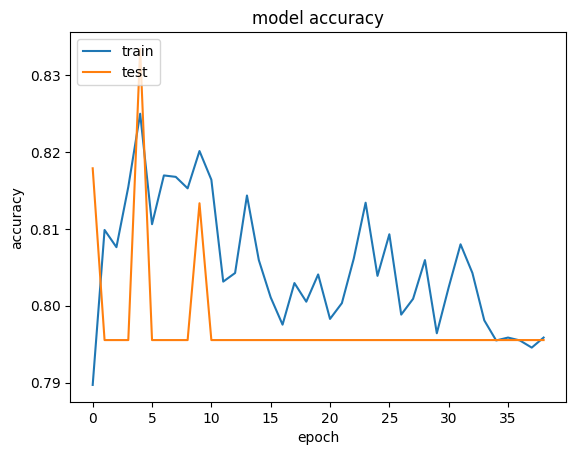

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

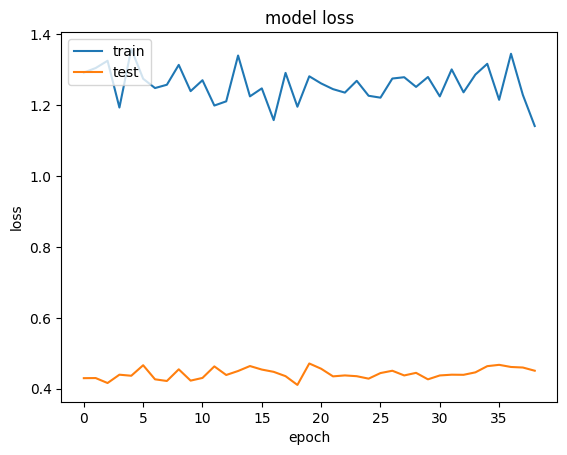

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# part-3 making the predictions and evalutting the model
# predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1529,   66],
       [ 210,  195]])

In [ ]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.862

In [ ]:
# get the weights
classifier.get_weights()

[array([[ 0.02542765,  0.07322707, -0.051626  ,  0.15374885, -0.05718338,
          0.45519   ,  0.04317076, -0.37605473,  0.27240983, -0.01747117,
         -0.3925959 ],
        [-0.17064095,  1.1109215 , -0.01194591,  0.7507728 ,  0.76480323,
          0.08460537,  0.01212858, -0.6300641 , -0.68689895, -0.07919905,
         -0.04196471],
        [ 0.04826615, -0.21395877,  0.22723997, -0.37304893,  0.08280828,
          0.45050097,  0.21095225,  0.33840862, -0.28799558, -0.01550967,
         -0.21636045],
        [-0.15031403, -0.15055227, -1.3301402 ,  0.01655704, -0.34583074,
         -0.7836574 ,  0.12048557,  0.36628386, -0.35465175,  0.38570368,
         -0.11538109],
        [ 0.02526031, -0.80656725, -1.0761541 ,  0.65454954, -0.01556005,
          0.8265972 ,  0.56566423,  0.8941819 ,  0.27778587,  1.1391941 ,
          0.0189673 ],
        [-0.15099725, -0.32056543,  0.05348691, -0.06927715, -0.06486238,
         -0.11976996,  0.6180935 ,  0.24583957, -0.22885504, -0.0135855